In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv


In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
def histogram(x):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=x,bins=20,kde=True)
    plt.title(f'{i} Distribution')
    plt.show()

/tmp/ipykernel_30/2527686367.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=feature, data=df, bins=20, kde=True, palette='Set1')  # Fitur individu
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/2527686367.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=feature, data=df, bins=20, kde=True, palette='Set1')  # Fitur individu
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/2527686367.py:6: UserWarning: Ignoring `palette` because

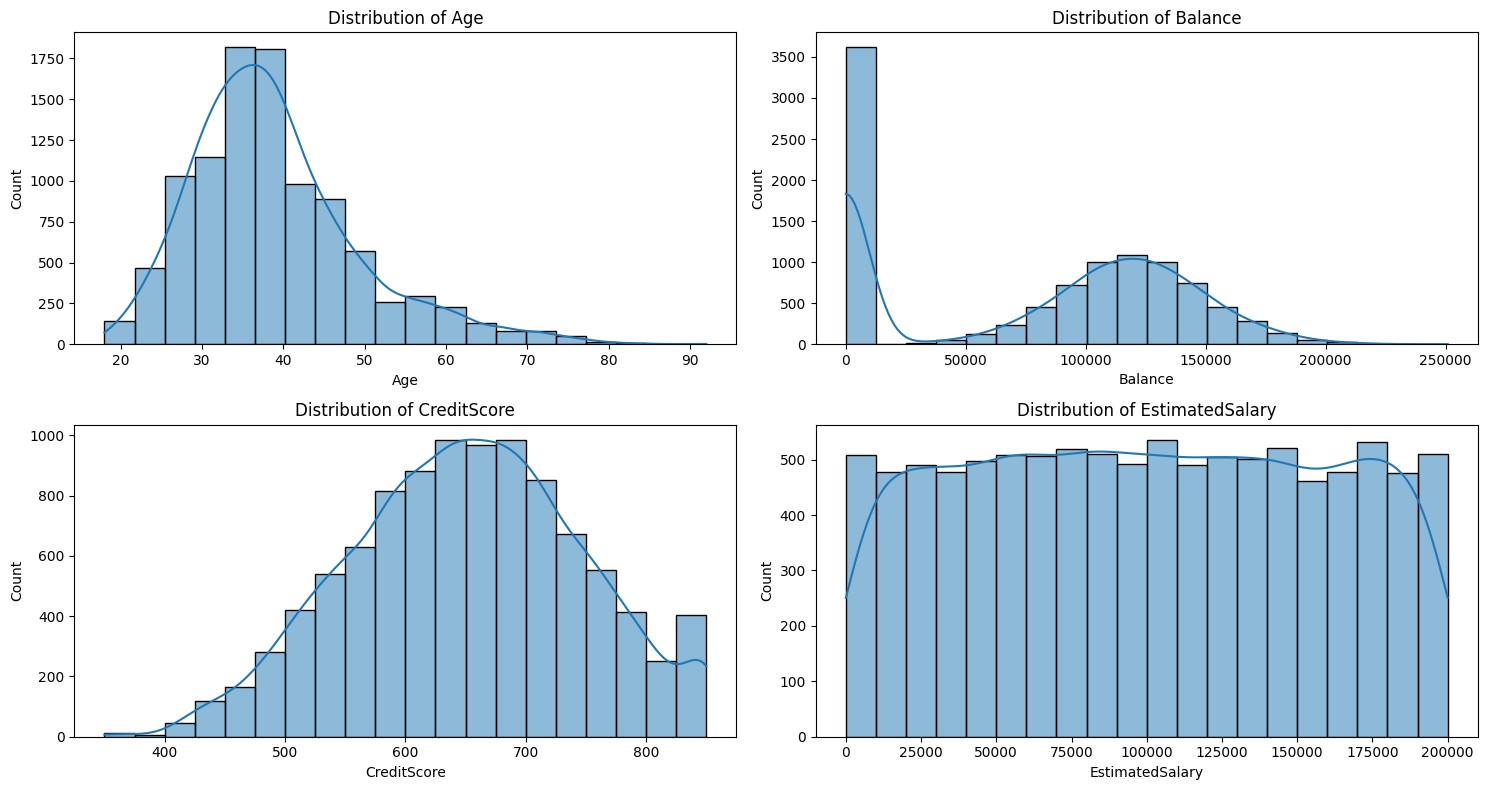

In [38]:
plt.figure(figsize=(15, 8))
features = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary']

for i, feature in enumerate(features, 1):  # Loop untuk setiap fitur
    plt.subplot(2, 2, i)  # Gunakan grid 2x2 karena ada 4 fitur
    sns.histplot(x=feature, data=df, bins=20, kde=True, palette='Set1')  # Fitur individu
    plt.title(f'Distribution of {feature}')  # Judul sesuai fitur
    plt.xlabel(feature)  # Label sumbu x sesuai fitur

plt.tight_layout()  # Sesuaikan tata letak subplot
plt.show()

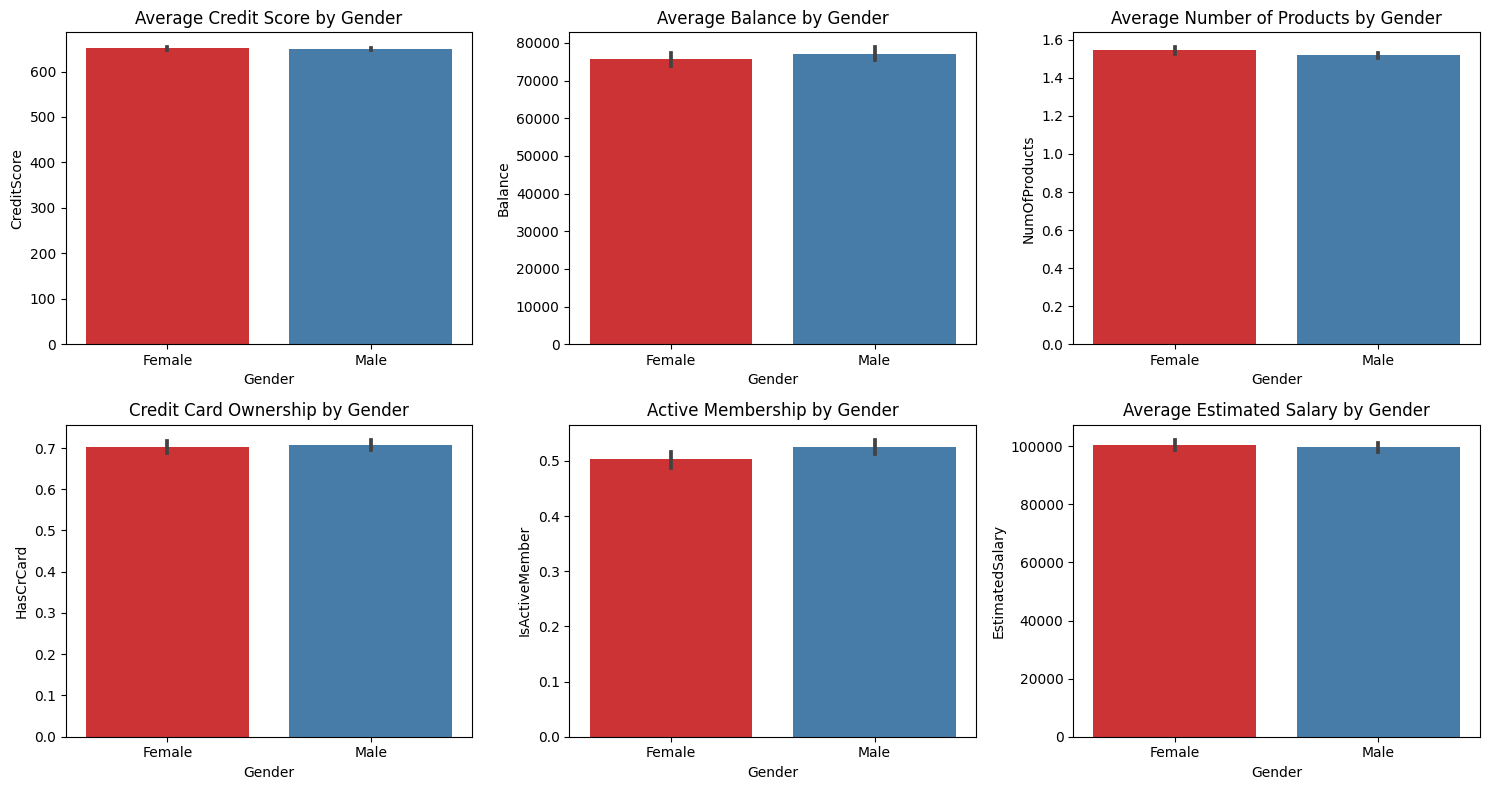

In [32]:
plt.figure(figsize=(15,8))
features = ['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
titles = ['Average Credit Score by Gender', 'Average Balance by Gender', 
          'Average Number of Products by Gender', 'Credit Card Ownership by Gender', 
          'Active Membership by Gender', 'Average Estimated Salary by Gender']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Gender', y=feature, data=df, palette='Set1')
    plt.title(titles[i-1])
    plt.xlabel('Gender')

plt.tight_layout()
plt.show()

In [39]:
gender_value = df['Gender'].value_counts()
gender_index = ['Male','Female']
gender_value,gender_index

(Gender
 Male      5457
 Female    4543
 Name: count, dtype: int64,
 ['Male', 'Female'])

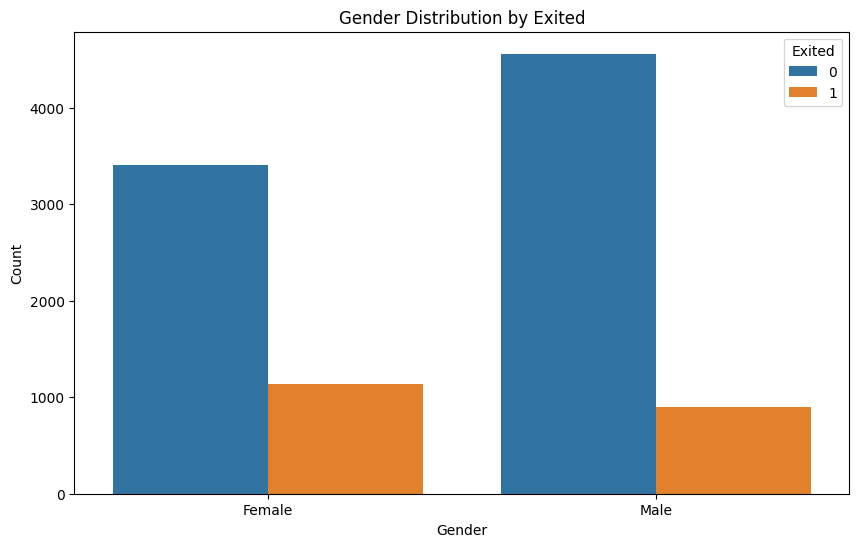

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df,hue='Exited')
plt.title('Gender Distribution by Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [10]:
df['CustomerId'].value_counts().sum()

10000

In [11]:
country_by_customer = df.groupby('Geography')['CustomerId'].size().reset_index()
country_by_customer.columns = ['Geography','Counts']
country_by_customer

,Geography,Counts
0,France,5014
1,Germany,2509
2,Spain,2477


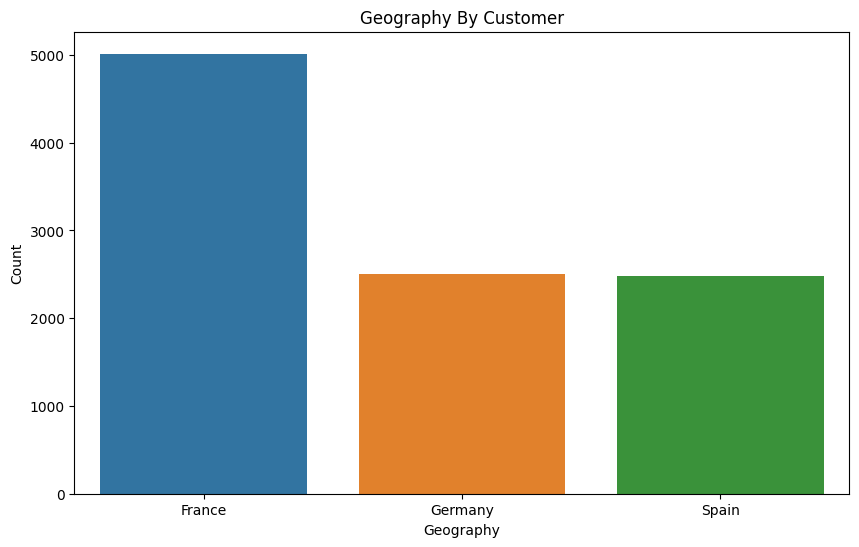

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=country_by_customer, x='Geography',y='Counts')
plt.title('Geography By Customer')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [76]:
cust_biggest_balance = df[['Surname','Geography','Gender','Age','Balance']].nlargest(5, 'Balance').reset_index(drop=True)
cust_biggest_balance

,Surname,Geography,Gender,Age,Balance
0,Lo,Spain,Male,38,250898.09
1,To Rot,France,Female,57,238387.56
2,Haddon,Spain,Male,42,222267.63
3,McIntosh,Spain,Male,40,221532.80
4,Shaw,Spain,Female,58,216109.88


In [81]:
geo_avg_balance = df.groupby('Geography')['Balance'].mean().reset_index()
geo_avg_balance.columns = ['Geography/Nation','Average Balance']
geo_avg_balance

,Geography/Nation,Average Balance
0,France,62092.636516
1,Germany,119730.116134
2,Spain,61818.147763


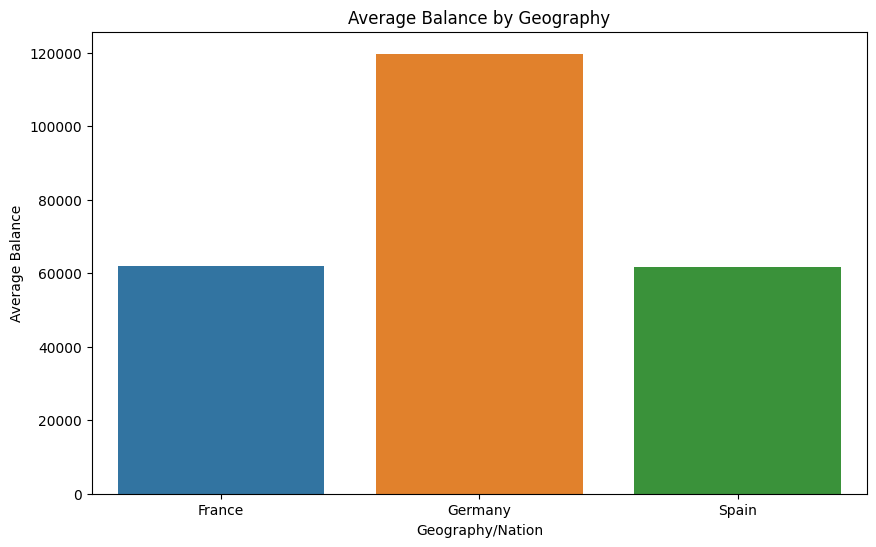

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(data=geo_avg_balance, x='Geography/Nation',y='Average Balance')
plt.title('Average Balance by Geography')
plt.show()

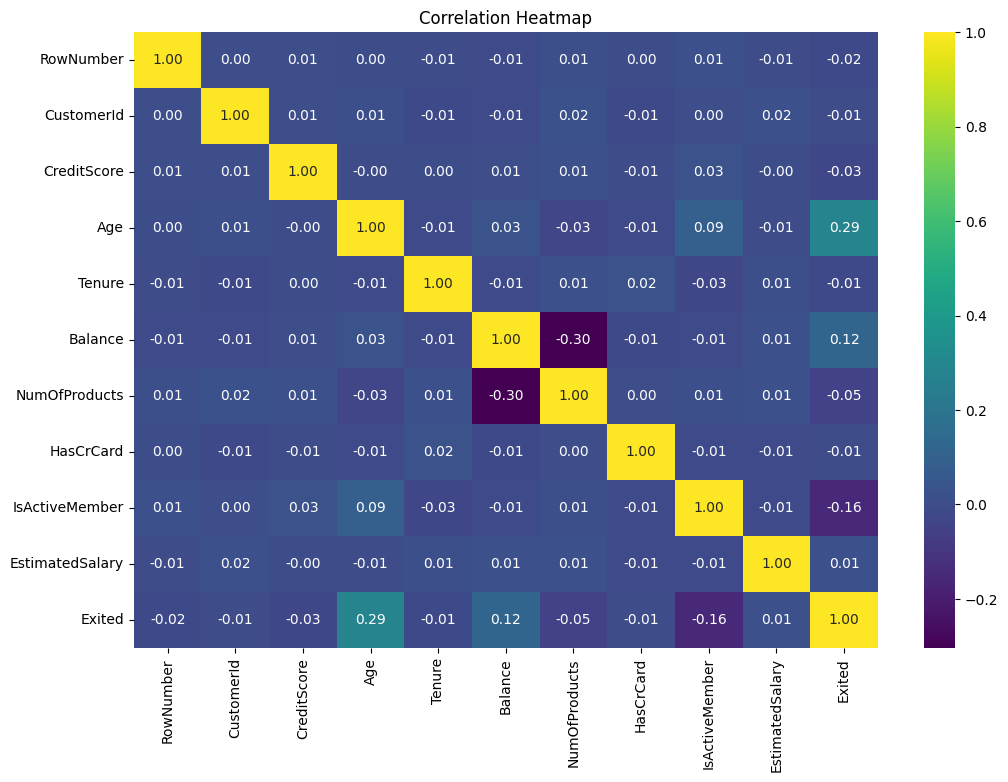

In [90]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi antar kolom numerik
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Modeling**

In [92]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import classification_report  # For generating precision, recall, and F1 score
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix to evaluate classification
from sklearn.metrics import accuracy_score  # For computing the accuracy of the model

In [95]:
le = LabelEncoder()
columns_to_encode = ['Geography', 'Gender']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [96]:
from sklearn.model_selection import train_test_split
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [97]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)

# Calculate accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Print accuracy
print("Random Forest - Training Accuracy:", accuracy_train_rf)

# Print the classification report
print("Random Forest - Training Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest - Testing Accuracy:", accuracy_test_rf)
print("Random Forest - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Training Accuracy: 1.0
Random Forest - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Random Forest - Testing Accuracy: 0.8645
Random Forest - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [99]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(x_train)
y_test_pred_xgb = xgb_model.predict(x_test)

# Calculate accuracy
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("XGBoost - Training Accuracy:", accuracy_train_xgb)

# Print the classification report
print("XGBoost - Training Classification Report:")
print(classification_report(y_train, y_train_pred_xgb))
print("XGBoost - Testing Accuracy:", accuracy_test_xgb)
print("XGBoost - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

XGBoost - Training Accuracy: 0.955375
XGBoost - Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6356
           1       0.97      0.81      0.88      1644

    accuracy                           0.96      8000
   macro avg       0.96      0.90      0.93      8000
weighted avg       0.96      0.96      0.95      8000

XGBoost - Testing Accuracy: 0.861
XGBoost - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

